<a href="https://colab.research.google.com/github/Thanmayeedindugala25/Excelr-NLP/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wordcloud -q

After that, let's import what we will need to successfully create our word cloud.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
dataset = "http://data.insideairbnb.com/canada/on/toronto/2023-03-09/data/listings.csv.gz"
df = pd.read_csv(dataset)

In [ ]:
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20230309202131,2023-03-10,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,...,5.00,5.00,5.00,NaN,f,1,1,0,0,0.08
1,8077,https://www.airbnb.com/rooms/8077,20230309202131,2023-03-10,city scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,...,4.90,4.92,4.83,NaN,t,2,1,1,0,1.02
2,26654,https://www.airbnb.com/rooms/26654,20230309202131,2023-03-10,city scrape,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,https://a0.muscache.com/pictures/81811785/5dcd...,113345,...,4.75,4.85,4.65,NaN,f,3,3,0,0,0.28
3,40456,https://www.airbnb.com/rooms/40456,20230309202131,2023-03-10,city scrape,Downtown- King Size Bed and Parking,---------------------Renovated and Newly Furn...,This is Nice Neighborhood located in Downtown ...,https://a0.muscache.com/pictures/b36b6ae3-20aa...,174063,...,4.96,4.57,4.68,NaN,f,4,4,0,0,0.74
4,27423,https://www.airbnb.com/rooms/27423,20230309202131,2023-03-10,city scrape,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,...,5.00,4.83,4.83,NaN,f,1,1,0,0,0.17


In [ ]:
#Some examples of descriptions

print(f"Example 1:", df.iloc[10]["description"])
print(f"Example 2:", df.iloc[40]["description"])
print(f"Example 3:", df.iloc[100]["description"])



Example 1: Our beautiful 2000SF, 2 BDRM suite is professionally designed and decorated and is “Your Home Away From Home”. Situated in Toronto's best neighbourhood on a quiet residential street, yet steps to the subway, High Park and Toronto's best restaurants. Scored 98/100 on  Interational Walkscore website<br /><br /><b>The space</b><br />Beautiful Large newly renovated and professionally designed sunny 2 bedroom Apartment with Office/Study on the 2nd and 3rd floors, of a 3 story house. There is a  large 11’x22’ (22SM) balcony that is shaded by an 100+yr old tree with plentiful afternoon and evening sun. Hardwood flooring installed throughout the Apt. The bathroom has a stacked washer/dryer. The bathroom has a granite countertop with a double sink, and tub/shower. The Kitchen comes with granite countertops, 28LF of cabinets, dishwasher, refrigerator, stove and double sink. The living room/dining room is 28'x12'.(32SM) The large third floor bedrooms are 14’x12 (16SM), one has a walk-i

In [ ]:
print("Missing values ​​in our database:", df.description.isnull().sum())

Missing values ​​in our database: 246


In [ ]:
#Eliminating missing values
description = df.dropna(subset=["description"], axis = 0)["description"]


Creating the list to be used as a **database** for building the word cloud

In [ ]:
#Concatenate words
all_description = " ".join(s for s in description)

print("Number of words : {}".format(len(all_description)))

Number of words : 12546853


In [ ]:
#Stopword list
stopwords = set(STOPWORDS)


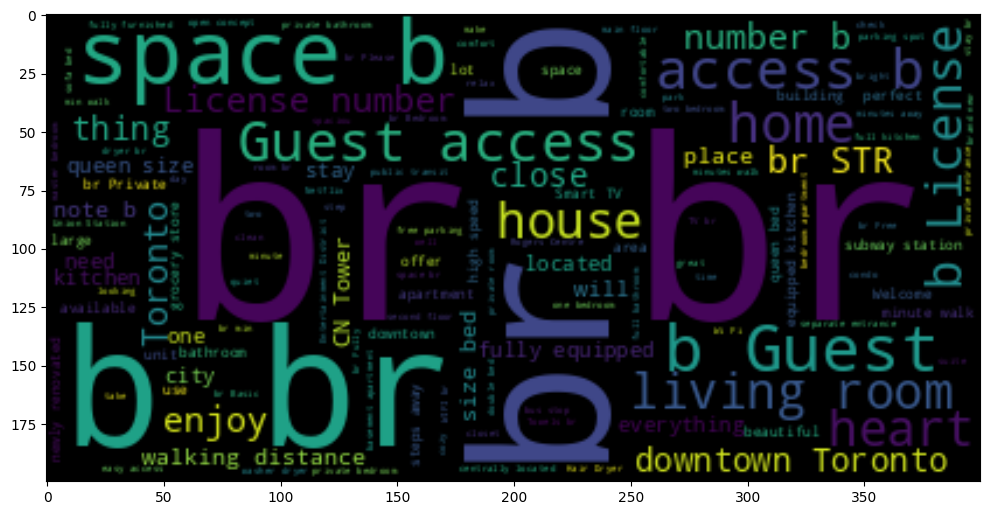

In [ ]:
#Generating a word cloud
wordcloud = WordCloud (stopwords = stopwords,
                       background_color = "black").generate(all_description)


#Image
fig , ax = plt.subplots(figsize = (10,6))
ax.imshow(wordcloud, interpolation = "bilinear")

plt.tight_layout()

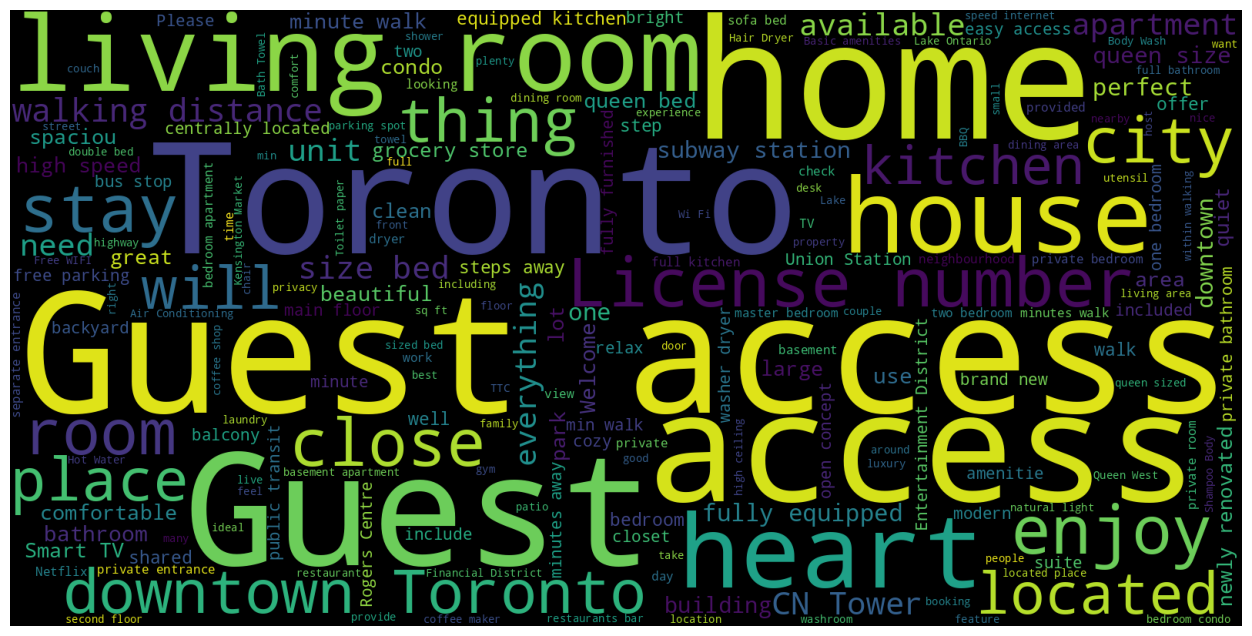

In [ ]:
#Configuring stopwords list
stopwords = set(STOPWORDS)
stopwords.update(["br", "space", "b", "are", "the", "we", "mine", "by","come", "STR","much","etc","s","note","make"])

#Generating a word cloud
wordcloud = WordCloud (stopwords = stopwords,
                        background_color = "black",
                        width = 1600, height = 800).generate(all_description)

#Image
fig, ax = plt.subplots(figsize = (16,8))
ax.imshow(wordcloud, interpolation = "bilinear")

ax.set_axis_off()

plt.imshow(wordcloud)


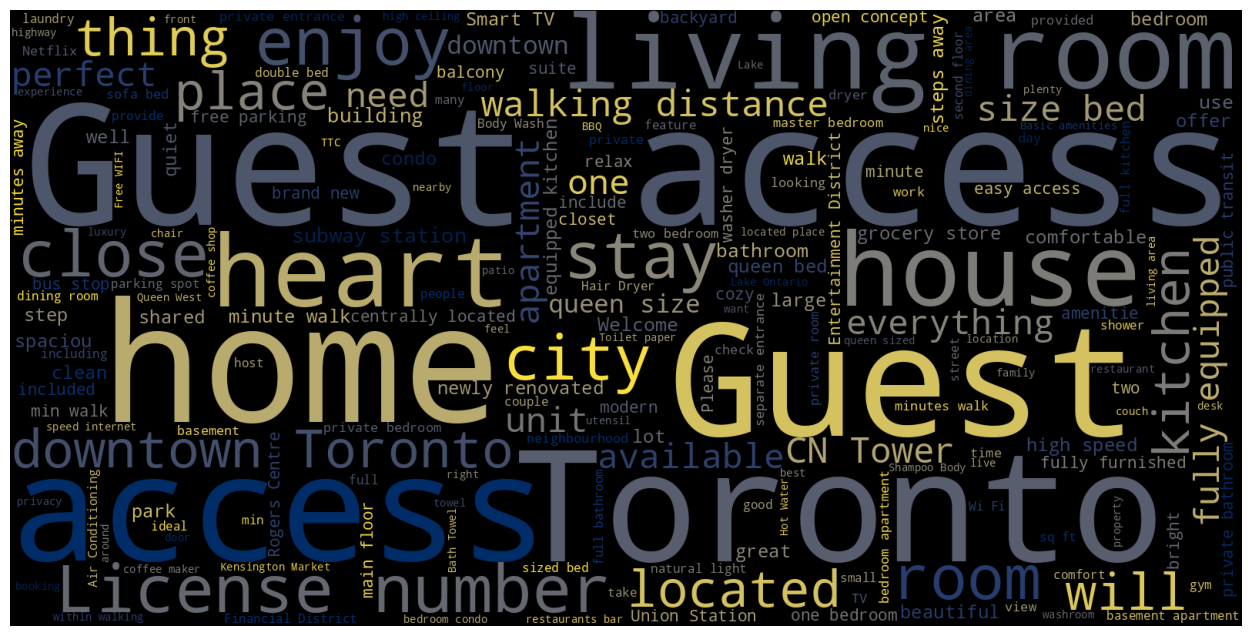

In [ ]:
#Configuring stopwords list
stopwords = set(STOPWORDS)
stopwords.update(["br", "space", "b", "are", "the", "we", "mine", "by","come", "STR","much","etc","s","note","make"])

#Generating a word cloud
wordcloud = WordCloud (stopwords = stopwords,
                        background_color = "black", colormap = "cividis",
                        width = 1600, height = 800).generate(all_description)

#Image
fig, ax = plt.subplots(figsize = (16,8))
ax.imshow(wordcloud, interpolation = "bilinear")

ax.set_axis_off()

plt.imshow(wordcloud)

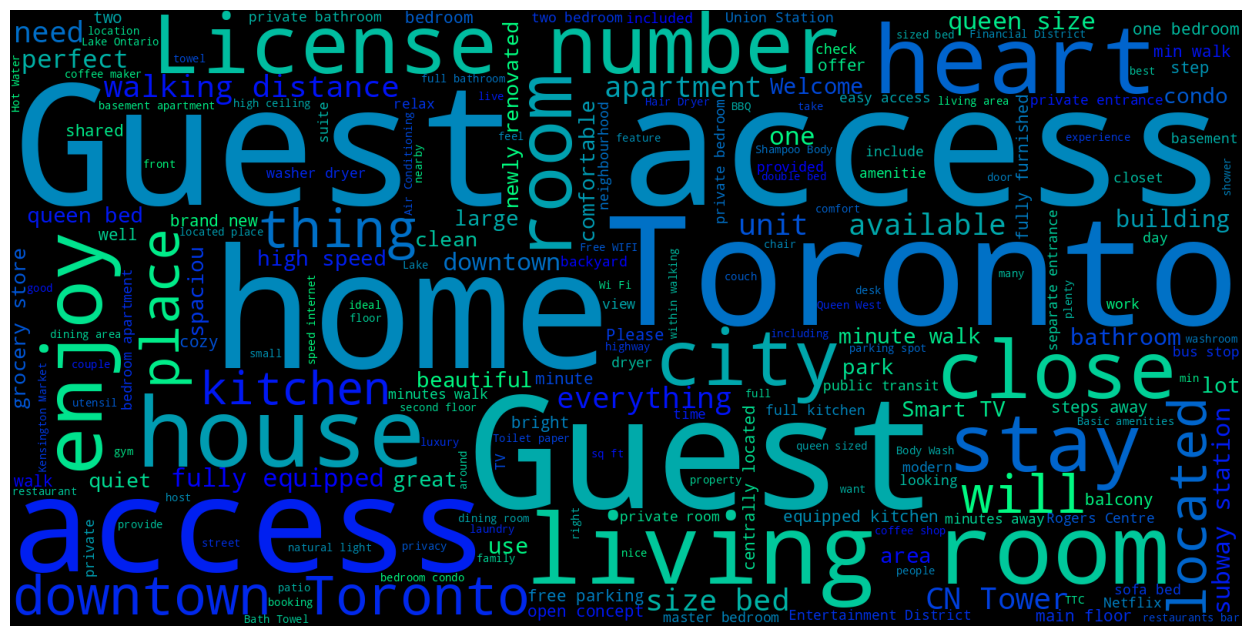

In [ ]:
#Configuring stopwords list
stopwords = set(STOPWORDS)
stopwords.update(["br", "space", "b", "are", "the", "we", "mine", "by","come", "STR","much","etc","s","note","make"])

#Generating a word cloud
wordcloud = WordCloud (stopwords = stopwords,
                        background_color = "black", colormap = "winter",
                        width = 1600, height = 800).generate(all_description)

#Image
fig, ax = plt.subplots(figsize = (16,8))
ax.imshow(wordcloud, interpolation = "bilinear")

ax.set_axis_off()

plt.imshow(wordcloud)

In [ ]:
wordcloud.to_file("archive_wordcloud.png")